# Agglomerative Hierarchical Clustering

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df["CustomerID"].value_counts()

CustomerID
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: count, Length: 200, dtype: int64

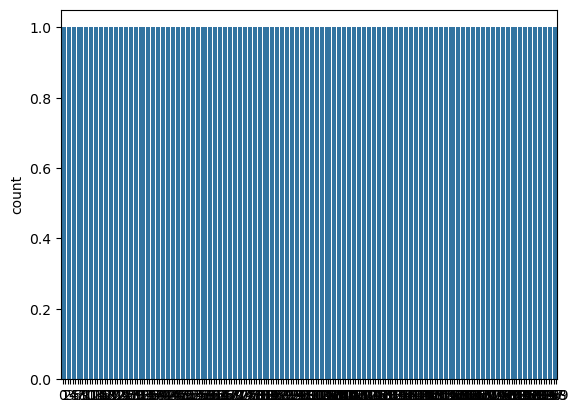

In [ ]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(figsize=(50,50))
sb.countplot(df["Age"])
plt.show()

In [8]:
plt.plot(figsize=(8,5))
plt.hist(df["Annual Income (k$)"], color='orange', edgecolor='k')
plt.title("Annual Income distribution")
plt.xlabel("Annual Income")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

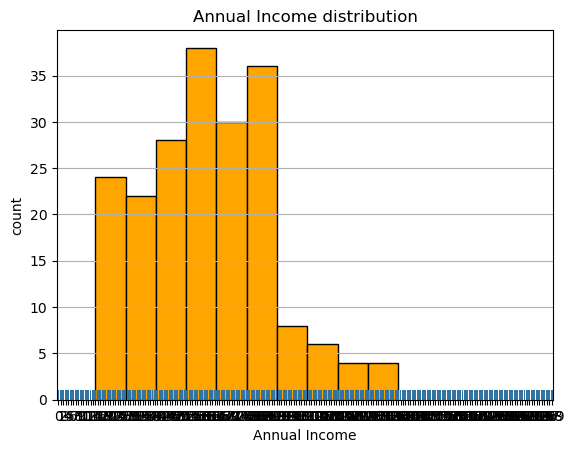

In [9]:
sb.countplot(df["Annual Income (k$)"])
plt.show()

In [10]:
df.corr()

ValueError: could not convert string to float: 'Male'

In [ ]:
df2 = df[["Spending Score (1-100)","Annual Income (k$)","Age"]].mean()
print(df2)

Spending Score (1-100)    50.20
Annual Income (k$)        60.56
Age                       38.85
dtype: float64


In [ ]:
column1 = df["Age"]
column2 = df["Annual Income (k$)"]
column3 = df["Spending Score (1-100)"]
max_value1 = column1.max()
max_value2 = column2.max()
max_value3 = column3.max()
print(max_value1)
print(max_value2)
print(max_value3)

70
137
99


array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

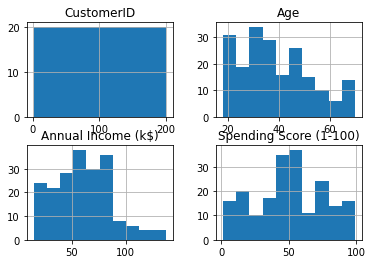

In [ ]:
df.hist()

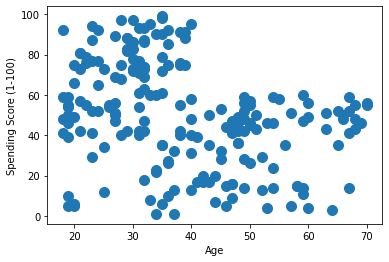

In [ ]:
# Bivariate

df.plot.scatter(x = 'Age', y = 'Spending Score (1-100)', s = 100);

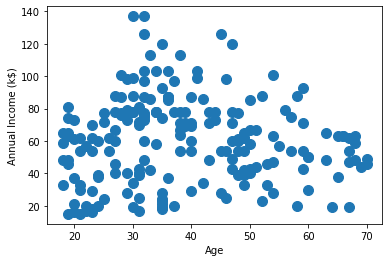

In [ ]:
df.plot.scatter(x = 'Age', y = 'Annual Income (k$)', s = 100);

<AxesSubplot:>

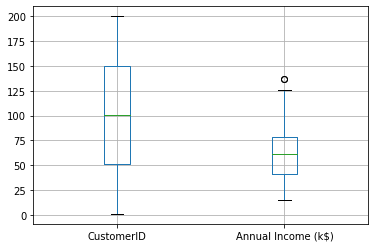

In [ ]:
# Discrete and Continuous

df.boxplot(["CustomerID","Annual Income (k$)"])

<AxesSubplot:>

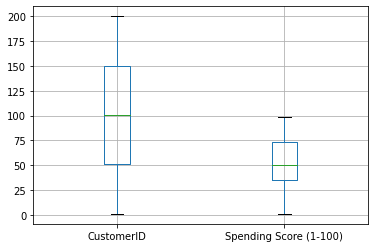

In [ ]:
df.boxplot(["CustomerID","Spending Score (1-100)"])

<function matplotlib.pyplot.show(close=None, block=None)>

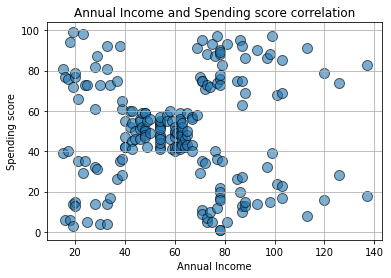

In [ ]:
plt.plot(figsize=(8,5))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], edgecolor='k', alpha=0.6, s=100)
plt.title("Annual Income and Spending score correlation")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.grid(True)
plt.show

In [ ]:
# Hierarchial Clustering-Agglomerative Clustering



In [ ]:
X = df.iloc[ : , 3:].values
print(X[:10], "\n\n")
print(X[-10:])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]] 


[[103  23]
 [103  69]
 [113   8]
 [113  91]
 [120  16]
 [120  79]
 [126  28]
 [126  74]
 [137  18]
 [137  83]]


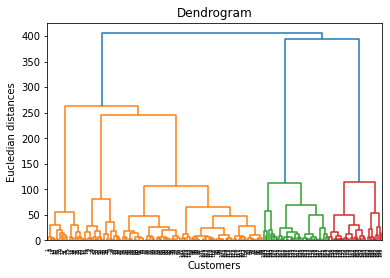

In [ ]:
import scipy.cluster.hierarchy as sch

plt.plot(figsize=(20,20))
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distances")
plt.show()

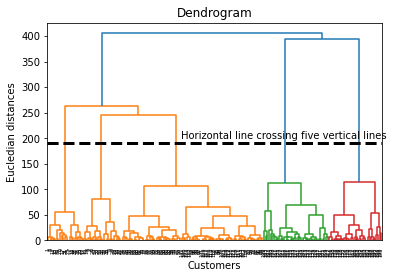

In [ ]:
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distances")
plt.hlines(y=190,xmin=0 , xmax=2000, lw=3, linestyles="--", color='black')
plt.text(x=800, y=200, s="Horizontal line crossing five vertical lines", fontsize=10)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [ ]:
print("X: ", X[:10])
print("\n \n")
print("y_hc: ", y_hc)

X:  [[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]

 

y_hc:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


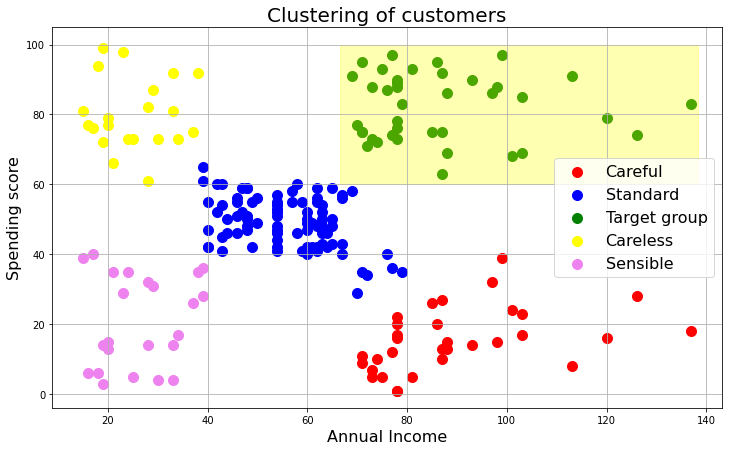

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Target group')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='yellow', label='Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='violet', label='Sensible')

plt.title("Clustering of customers", fontsize=20)
plt.xlabel("Annual Income", fontsize=16)
plt.ylabel("Spending score", fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.axhspan(ymin=60, ymax=100, xmin=0.43, xmax=0.965, alpha=0.3, color="yellow")

plt.show()